In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('data/stud.csv')

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
df.shape

(1000, 8)

## Checagem nos dados
- Checagem de Missings
- Checagem de Duplicidades
- Checagem dos data types
- Checagem o numero unico dos valores para cada coluna
- Checagem das estatísticas
- Checagem das categorias presentes nas variaveis categoricas

### Missings

In [44]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Não há valores missings

### Duplicidades

In [45]:
df.duplicated().sum()

0

Sem duplicidades

### Data types

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


### Valores Unicos

In [47]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Estatísticas

In [48]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Conclusoes:
- A média dos valores numericos são parecidas, entre 66 a 69
- Todos os desvios-padrões também são próximos, de 14.6 a 15.1
- Para matematica, o valor minimo é 0 e para leitura/escrita, esses valores mínimos são um pouco maiores.

#### Analise Exploratoria

In [49]:
print("Categorias em 'gender':  ",end=" ")
print(df['gender'].unique())

print("Categorias em 'race/ethnicity':  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categorias em 'parental level of education':  ",end=" ")
print(df['parental level of education'].unique())

print("Categorias em 'lunch':  ",end=" ")
print(df['lunch'].unique())

print("Categorias em 'test preparation course':  ",end=" ")
print(df['test preparation course'].unique())

Categorias em 'gender':   ['female' 'male']
Categorias em 'race/ethnicity':   ['group B' 'group C' 'group A' 'group D' 'group E']
Categorias em 'parental level of education':   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorias em 'lunch':   ['standard' 'free/reduced']
Categorias em 'test preparation course':   ['none' 'completed']


In [50]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Temos {} variaveis numericas: {}'.format(len(numeric_features), numeric_features))
print('Temos {} variaveis categoricas: {}'.format(len(categorical_features), categorical_features))

Temos 3 variaveis numericas: ['math score', 'reading score', 'writing score']
Temos 5 variaveis categoricas: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adicionando colunas de Total Score e Média

In [51]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f'Numero de alunos que gabaritaram Matematica {math_full}')
print(f'Numero de alunos que gabaritaram Escrita {writing_full}')
print(f'Numero de alunos que gabaritaram Leitura {reading_full}')

Numero de alunos que gabaritaram Matematica 7
Numero de alunos que gabaritaram Escrita 14
Numero de alunos que gabaritaram Leitura 17


In [53]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()

print(f'Numero de alunos com menos de 20 acertos em Matematica {math_less_20}')
print(f'Numero de alunos com menos de 20 acertos em Escrita {writing_less_20}')
print(f'Numero de alunos com menos de 20 acertos em Leitura {reading_less_20}')

Numero de alunos com menos de 20 acertos em Matematica 4
Numero de alunos com menos de 20 acertos em Escrita 3
Numero de alunos com menos de 20 acertos em Leitura 1


### Conclusoes:
- Os alunos constumam ser piores em Matematica
- Os alunos costumam acertar mais em Leitura

## Visualização dos Dados
- Histogramas
- Distribuição (KDE)

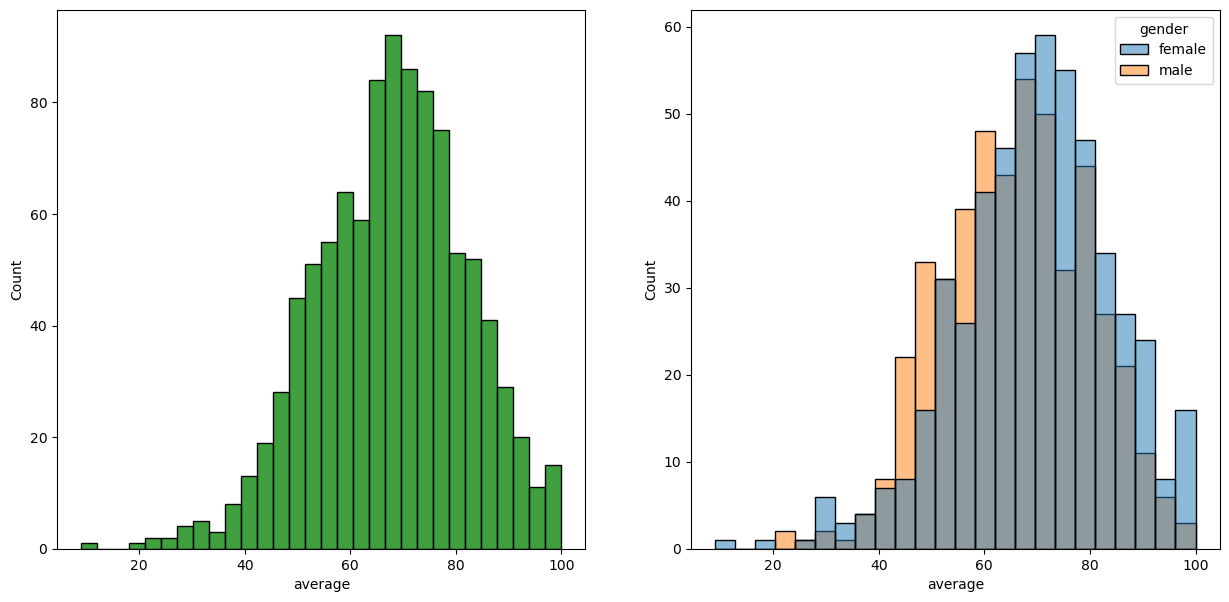

In [62]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

sns.histplot(data=df, ax=axes[0], x='average', bins=30, fill=True, color='g')

sns.histplot(data=df, ax=axes[1], x='average', fill=True, hue='gender')
plt.show()

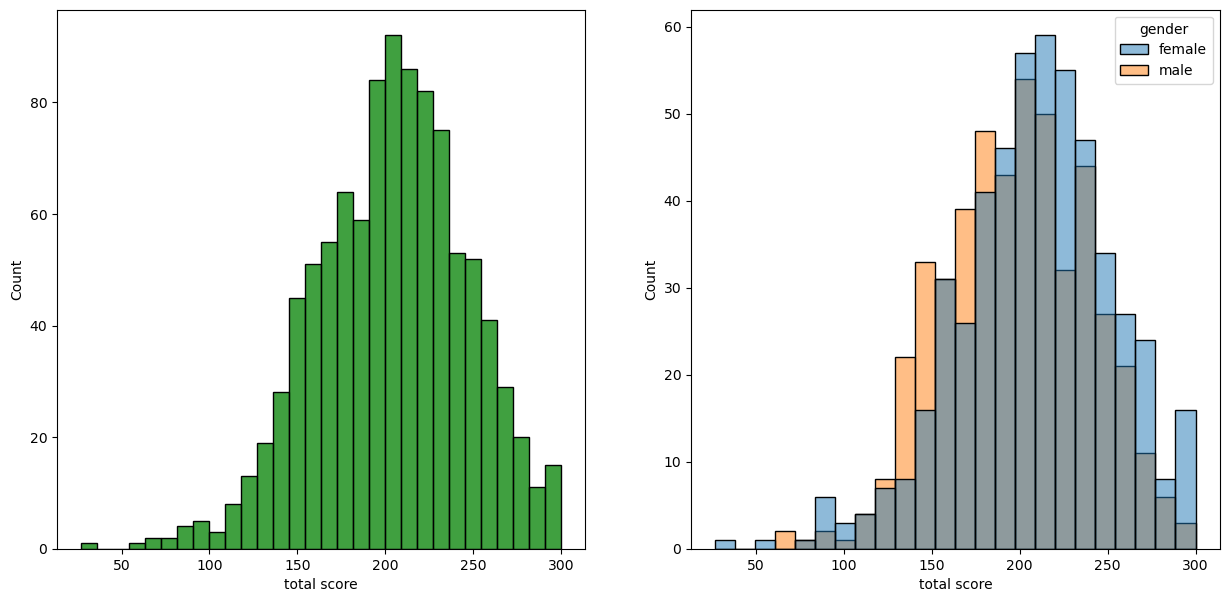

In [63]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

sns.histplot(data=df, ax=axes[0], x='total score', bins=30, fill=True, color='g')

sns.histplot(data=df, ax=axes[1], x='total score', fill=True, hue='gender')
plt.show()

### Conclusões:
- Mulheres tem melhores pontuações que os homens

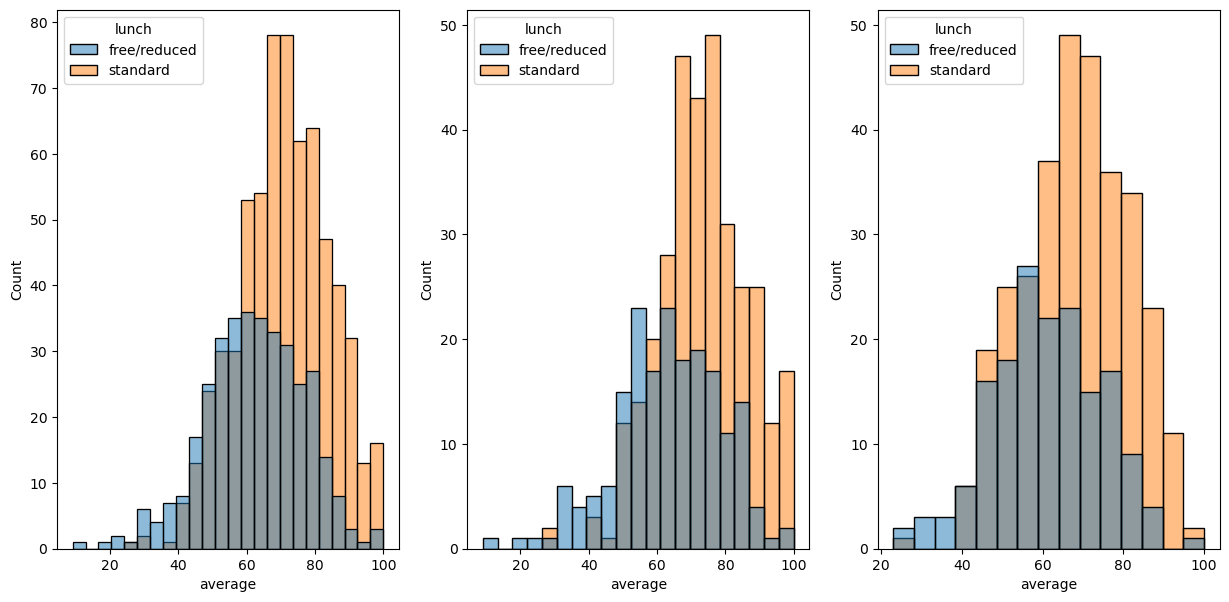

In [68]:
fig, axes = plt.subplots(1,3,figsize=(15,7))

sns.histplot(data=df.sort_values(by='lunch'), ax=axes[0], x='average', fill=True, hue='lunch')

sns.histplot(data=df[df['gender']=='female'].sort_values(by='lunch'),ax=axes[1], x='average', fill=True, hue='lunch')

sns.histplot(data=df[df['gender']=='male'].sort_values(by='lunch'), ax=axes[2],x='average', fill=True, hue='lunch')

plt.show()